# Eric He
# Numerical Analysis
# Assignment 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## **1. Let $f(x) = e^x - x^2 - 2x - 1$ and $g(x) = 2ln(x+1)$, where $x \in (-1, \infty)$.**

### **a) Verify that the roots of f(x) are the same as the fixed points of g(x).**

i.e. show $f(x) = 0 \iff g(x) - x = 0$.

\begin{align}
& e^x - x^2 - 2x - 1 = 0 \\
&\iff e^x - (x+1)^2 = 0 \\
&\iff e^x = (x + 1)^2 \\
&\iff x = \ln(x + 1)^2 \\
&\iff x = 2\ln(x+1) \\
&\iff 2\ln(x + 1) - x = 0
\end{align}

### **b) Sketch y = g(x), y = x and indicate all fixed points. You don't need to calculate them.**

Two fixed points, one at $x = 0$ and the other between $x = 2$ and $x = 3$.

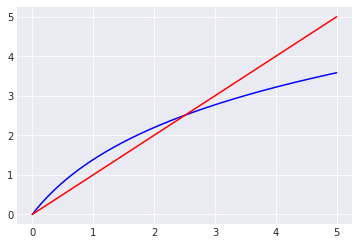

In [2]:
x = np.linspace(0, 5, 1000)
y = 2 * np.log(x + 1)
plt.plot(x, y, color="blue")
plt.plot(x, x, color="red") # plot y = x

### **c) Use Brouwer's fixed point theorem to argue the existence of a fixed point $\xi$ in the interval $[a, b] = [e - 1, e^2 - 1]$.**

Since $\dfrac{d}{dx}2\ln(x+1) = \dfrac{2}{x + 1} > 0$ for $x > 0$, the function is strictly increasing in the interval, meaning the left endpoint is the minimum value and the right endpoint takes the maximum value over any positive domain. At $x = e - 1$, the function takes on the value $2$, and at $x = e^2 - 1$, the function takes on the value $4$. Since $e - 1 < 2 < 4 < e^2 - 1$, the range is bounded within the domain.

Then the conditions of Brouwer's fixed point theorem are satisfied and there exists a fixed point $\xi$ in the interval $[e - 1, e^2 - 1]$.

### d) Use the contraction mapping theorem to show that $\xi$ is the only fixed point in the interval $[e-1, e^2-1]$

Because the range is a subset of the domain, and because the function is strictly increasing, the function $2\ln(x+1)$ must be a contraction on the interval $[e - 1, e^2 - 1]$. Then the requirements of the contraction mapping theorem are satisfied and $\xi$ is the only fixed point in that interval.

## 2. We attempt to find all solutions to $f(x) = 0$, where $f(x) = e^x - 3x - 1$.

### a) Sketch $y = f(x)$ for $-1 \leq x \leq 3$. How many solutions $\xi$ does $f(x) = 0$ have?

There is only one solution.

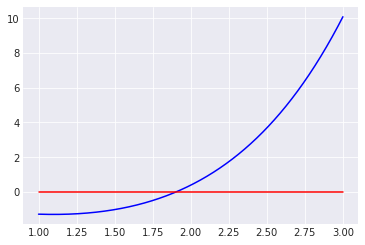

In [3]:
x = np.linspace(1, 3, 1000)
y = np.exp(x) - 3*x - 1
plt.plot(x, y, color="blue")
plt.plot(x, x - x, color="red") # plot y = 0

### b) Write code to implement the bisection method. Using the initial interval $[1, 3]$, write down the sequence of approximations $x_1, x_2, x_3, x_4, x_5$ produced from your code.

In [4]:
# function to run 1 bisect iteration
# return new left, right endpoints
def bisect(left_endpoint, right_endpoint, function):
    # compute values at the given left, right endpoints
    right_value = function(right_endpoint)
    mid_value = function((left_endpoint + right_endpoint) / 2)
    # choose new endpoint
    if mid_value * right_value > 0:
        right_endpoint = (left_endpoint + right_endpoint) / 2
    else:
        left_endpoint = (left_endpoint + right_endpoint) / 2
    return left_endpoint, right_endpoint

# initialize starting params
left = 1
right = 3
def fct(x):
    return(np.exp(x) - 3*x -1)
midpoints = []

# loop to run the bisection method 5 times
# records new midpoints each iteration
for i in range(101):
    left, right = bisect(left, right, fct)
    midpoints.append((left + right) / 2)
    
midpoints[:5]

[1.5, 1.75, 1.875, 1.9375, 1.90625]

### c) What is the theoretical maximum value of $|x_5 - \xi|$? How large must we take $n$ to ensure that $|x_n - \xi| \leq 10^{-10}$?

If the distance between the initial left endpoint and the initial right endpoint is $d$, then the maximum value of the distance between the left and right endpoints after the 5th bisection $d_5$ has to be $\dfrac{d}{2^5}$. Since the approximation of $\xi$ is the midpoint between the left and right endpoints, and $\xi$ is necessarily between the left and right endpoints, then **the distance between $|x_5 - \xi|$ is at most $\dfrac{d}{2^6} = \dfrac{2}{2^6} = 2^{-5}$.**

To ensure $x_n - \xi \leq 10^{-10}$, we have to have $n$ such that $2^{-n} \leq 10^{-10}$. Since $10^{-10} > 16^{-10} = 2^{4^{-10}} = 2^{-40}$, we have to run at most 40 iterations of the bisection method.

### d) We now look at the fixed point $x = g(x)$ with $g(x) = \ln(3x+1)$. Show that this is equivalent to finding the roots of $f$.

\begin{align}
& e^x - 3x - 1 = 0 \\
&\iff e^x = 3x + 1 \\
&\iff x = \ln(3x + 1) \\
&\iff \ln(3x + 1) - x = 0
\end{align}

### e) Implement the fixed point iteration method for $x = g(x)$ given above. Using the initial point $x_0 = 1$, write down the iterates $x_1, x_2, x_3, x_4, x_5$.

In [5]:
def fixed_point(x, function):
    return function(x)

# setup
x = 1
estimates = []
def fct(x):
    return np.log(3*x + 1)

# loop to run the fixed point iteration method 5 times
# record each iterate
for i in range(101):
    x = fixed_point(x, fct)
    estimates.append(x)
    
estimates[:5]

[1.3862943611198906,
 1.6407200993500939,
 1.778701297541748,
 1.846264051572333,
 1.8777524625894917]

### f) Plot the two sequences $(x_n)$ produced above as functions of $n$, with $n = 0, 1, ..., 100$. Is one method faster than the other?

The fixed point method converges quickly and more smoothly than the bisection method.

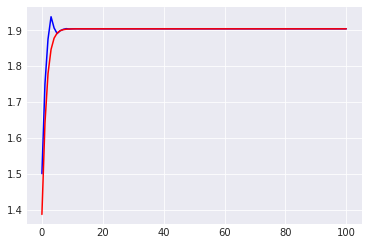

In [6]:
plt.plot(range(101), midpoints, color='blue')
plt.plot(range(101), estimates, color='red')

## 3. Let $\alpha \geq 0$ and consider the function $g(x) = x^3 - 2x^2 + 2x\alpha$.

### a) What are the fixed points of $g$ depending on $\alpha$ (calculate them analytically)? Make a plot with $\alpha$ as $x$-axis and the solution(s) as $y$-axis.

\begin{align}
& x = x^3 - 2x^2 + 2x\alpha \\
& \iff 0 = x^3 - 2x^2 + (2\alpha -1)x \\
& \iff 0 = x(x^2 - 2x + (2\alpha - 1)
\end{align}

Clearly $x = 0$ is a root. Using the quadratic formula, we get as the other two other roots
$$\big(2 \pm \sqrt{4 - 4(2\alpha - 1)}\big) / 2$$

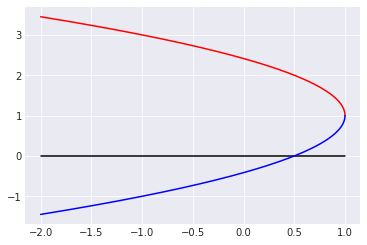

In [7]:
alphas = np.linspace(-2, 1, 1000)
root_0 = alphas - alphas # 0 is the root
root_1 = (2 + (np.sqrt(4 - 4*(2 * alphas - 1)))) / 2
root_2 = (2 - (np.sqrt(4 - 4*(2 * alphas - 1)))) / 2

plt.plot(alphas, root_0, color='black')
plt.plot(alphas, root_1, color='red')
plt.plot(alphas, root_2, color='blue')

### b) Consider the fixed point iteration $x_{k+1} = g(x_k)$ for this $g$. What can you say about the stability of the fixed points in dependence of $\alpha$? You may assume that the initial guess is sufficiently close to the fixed point.

The derivative of $g$ is $3x^2 - 4x + 2\alpha$. The derivative is displayed below for $\alpha = 0$. Plots for nonzero $\alpha$ are simply translations up and down of the plotted curve.

Since contraction is guaranteed when the derivative is less than 0, there is a small interval of values of $x$ for any given $\alpha$ where the mapping is contractive. For most values of $\alpha$, the positions of the fixed points usually do not align with the area where the derivative is between $(-1, 1)$. For $\alpha > \dfrac{1}{2}$, in fact, no fixed points are guaranteed to be stable because the derivative is strictly above $1$.

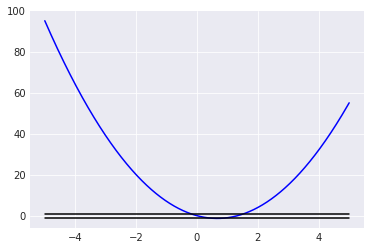

In [8]:
x = np.linspace(-5, 5, 1000)
y = 3*(np.power(x, 2)) - 4*x

plt.plot(x, y, color='blue')
plt.plot(x, x - x - 1, color='black')
plt.plot(x, x - x + 1, color='black')

### c) Discuss the case $\alpha = 1$ either graphically, analytically, or numerically.

When observing the plots of the fixed points for $\alpha=1$, the fixed point solutions for two roots converge to the same value at $x = 1$. Thus there are only 2 roots, one at $x=1$, and the other at $x=0$.

The plot of $g(x)$ is shown below for $\alpha = 1$. At the fixed point $(1, 1)$, the derivative of $g(x) = 1$ as well. This makes it impossible using the derivative tests to tell if the fixed point there is stable or unstable.

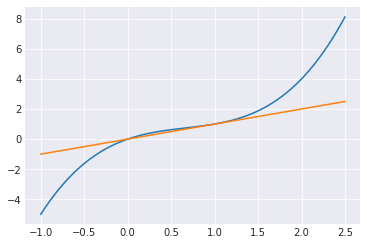

In [9]:
x = np.linspace(-1, 2.5, 1000)
y = np.power(x, 3) - 2*np.power(x, 2) + 2*x

plt.plot(x, y)
plt.plot(x, x)

## 4. Stability of fixed points.

### a) For each of the three functions depicted below, write down the approximate values of the fixed points as estimated by eye, and state, for each fixed point, whether it is stable, unstable, or neither of the two.

#### A.
1. $x = 0$ is **unstable** because the derivative is strictly greater than $1$ in the neighborhood and at the point.
2. $x = 5.5$ is **stable** because the derivative is strictly less than $1$ in the neighborhood and at the point.

#### B.
1. $x = 2$ is **neither stable nor unstable** because the derivative on the left is less than $1$, but the derivative on the right is greater than $1$.
2. $x = 8$ is **stable** because the derivative is strictly less than $1$.

#### C.
1. $x = 1.5$ is **unstable** because the absolute value of the derivative is strictly greater than $1$ in the neighborhood.
2. $x = 5$ is **unstable** because the absolute value of the derivative is strictly greater than $1$ in the neighborhood.

### b) You are given the first ten iterates of two sequences, $x_k$ and $y_k$, both of which converge to zero.

#### What do you think is the order of convergence of $x_k$? Explain your answer.
The order of convergence appears to be roughly linear since the the distance between each estimate and the truth is roughly a third of that of the previous estimate. This constant factor would place the algorithm's convergence in linear time.

#### What do you think is the order of convergence of $y_k$? Explain your answer.
The order of converge appears to be between quadratic and cubic when the estimates are close enough to the fixed point. This is because with each iteration, the number of correct digits more than doubles, but less than triples.

## 5. Let $g$ be defined on $[5\pi/8, 11\pi/8]$, $g(x) = x + 0.8\sin x$.
### Determine the smallest possible Lipschitz constant L. What can you say about the asymptotic rate of convergence. how many iterations are required to increase the accuracy by one decimal place?

The smallest possible Lipschitz constant $L$ is bounded below by the minimum of the derivative of $g(x)$. The derivative of $g(x) = 1 + 0.8\cos x$, making the minimum of the derivative $0.2$ when $\cos x = -1$ and the maximum $1.8$ when $\cos x = 1$. In the situation where $L$ is close to $0.2$, then the asymptotic rate of convergence is $\rho = -\log_{10}|g'(\xi)| = -\log_{10}0.2 = 0.7$. Around $10/7$ iterations are required to increase the accuracy by one decimal place.

## 6. We search for solutions in $[1, 2]$ to the equation $x^3 - 3x^2 + 3 = 0$.

### a) Compute a solution using the secant method in $[1, 2]$, and write down $x_0, ..., x_5$.

In [10]:
def secant(estimate, previous_estimate, function):
    derivative_estimate = (function(estimate) - function(previous_estimate)) / (estimate - previous_estimate)
    new_estimate = estimate - (function(estimate) / derivative_estimate)
    return new_estimate, estimate

# setup
estimate = 1
previous_estimate = 2
def fct(x):
    return np.power(x, 3) - 3*np.power(x, 2) + 3
estimates = [estimate]

# run 5 iterations of the secant method
for i in range(5):
    estimate, previous_estimate = secant(estimate, previous_estimate, fct)
    estimates.append(estimate)
    
estimates

[1,
 1.5,
 1.3636363636363638,
 1.3460559796437663,
 1.3473045251848954,
 1.3472963593292901]

### b) Find a solution using Newton's method with starting value $x_0 = 1.5$, and write down $x_0, ... x_5$.

In [11]:
def newton(estimate, function, derivative):
    new_estimate = estimate - function(estimate) / derivative(estimate)
    return new_estimate

# setup
estimate = 1.5
def fct(x):
    return np.power(x, 3) - 3*np.power(x, 2) + 3
def derivative_fct(x):
    return 3*np.power(x, 2) - 6*x
estimates = [estimate]

# run 5 iterations of Newton's method
for i in range(5):
    estimate = newton(estimate, fct, derivative_fct)
    estimates.append(estimate)
    
estimates

[1.5,
 1.3333333333333333,
 1.347222222222222,
 1.347296353163868,
 1.3472963553338606,
 1.3472963553338608]

### c) Find a solution using Newton's method with starting value $x_0 = 2.1$. Sketch the equation graph and try to explain the behavior.

In [12]:
estimate = 2.1
estimates = [estimate]

# run 5 iterations of Newton's method
for i in range(5):
    estimate = newton(estimate, fct, derivative_fct)
    estimates.append(estimate)
    
estimates

[2.1,
 3.6380952380952394,
 2.997908899750493,
 2.665738100120939,
 2.548406077463979,
 2.5323828383309896]

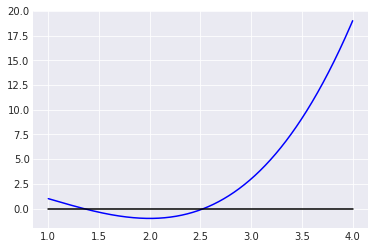

In [13]:
x = np.linspace(1, 4, 1000)
y = fct(x)
plt.plot(x, y, color='blue')
plt.plot(x, x-x, color='black')

The graph of the function shows there are two zeros, one near $1.34$ and one near $2.53$. This means that with different initializations of Newton's method, we can get convergence to different roots.

## 7. Find the limit and order of convergence for the following sequences:

### a) $x_{k+1} = \alpha x_k$ for some $|\alpha| < 1$.

${x_k}$ converges to $0$ at an asymptotic rate of $-\log_{10}\alpha$.

### b) $c_{k+1} = c_k - \tan c_k$. 

No obvious limit or convergence behavior for this sequence; behavior depends on $c_0$ as there are areas where $\tan$ is contractive and areas where it is not.

### c) $b_k = 2^{-2^k}$.

$b_k$ converges to 0 at a superlinear rate.

## 8. For $f: \mathbb{R} \to \mathbb{R}$ twice continuously differentiable, find the order of convergence of Steffensen's method $$x_{k+1} = x_k - \dfrac{[f(x_k)]^2}{f(x_k + f(x_k)) - f(x_k)}$$, which is used to solve $f(x) = 0$. How does this iteration relate to Newton's method?

Consider the second-order Taylor Series expansion of $f(x_k + f(x_k))$ about $x_k$,
\begin{align}
& f(x_k) + f'(x_k)[x_k + f(x_k) - x_k] + f''(\eta_1)[x_k + f(x_k) - x_k]^2 \\
& = f(x_k) + f'(x_k)f(x_k) + \dfrac{f''(\eta_1)f(x_k)^2}{2},
\end{align}
where $\eta_1$ is between $x_k$ and $x_k + f(x_k)$. 

We can substitute this value into the relation between $x_{k+1}$ and $x_k$ to get
$$x_{k+1} = x_k - \dfrac{f(x_k)}{f'(x_k) + \dfrac{f''(\eta_1)f(x_k)}{2}}$$.

We want to relate $\xi - x_{k+1}$ to $\xi - x_k$. It is clear from substituting in the above equality that
\begin{align}
&\xi - x_{k+1} \\
&= \xi - x_k + \dfrac{f(x_k)}{f'(x_k) + \dfrac{f''(\eta_1)f(x_k)}{2}} \\
&= (\xi - x_k)\big(\dfrac{f'(x_k) + \dfrac{f''(\eta_1)}{2}f(x_k)}{f'(x_k) + \dfrac{f''(\eta_1)}{2}f(x_k)}\big) + \dfrac{f(x_k)}{f'(x_k) + \dfrac{f''(\eta_1)f(x_k)}{2}} \\
&= \dfrac{f(x_k) + f'(x_k)(\xi - x_k) + \dfrac{f''(\eta_1)}{2}f(x_k)(\xi - x_k)}{f'(x_k) + \dfrac{f''(\eta_1)f(x_k)}{2}}
\end{align}

With the understanding that $f(\xi) = 0$, we can write the second-order Taylor expansion of $f(\xi)$ about $x_k$ as
$$0 = f(\xi) = f(x_k) + f'(x_k)(\xi - x_k) + \dfrac{f''(\eta_2)(\xi - x_k)^2}{2},$$
with $\eta_2$ between $x_k$ and $\xi$.

This allows us to substitute $f(x_k) + f'(x_k)(\xi - x_k)$ with $-\dfrac{f''(\eta_2)}{2}(\xi - x_k)^2$

The first-order Taylor expansion of $f(\xi)$ about $x_k$, on the other hand, yields
$$0 = f(\xi) = f(x_k) + f'(\eta_3)(\xi - x_k),$$
with $\eta_3$ between $x_k$ and $\xi$. Rearranging the terms, this becomes
$$f(x_k) = - f'(\eta_3)(\xi - x_k),$$
which we can substitute into the other $f(x_k)$ in the numerator.

This gives us

$$\xi - x_{k+1} = -\dfrac{\dfrac{f''(\eta_2)}{2}(\xi - x_k)^2 + \dfrac{f''(\eta_1)}{2}f'(\eta_3)(\xi - x_k)^2}{f'(x_k) + \dfrac{f''(\eta_1)f(x_k)}{2}}$$

We can see that simply by dividing the above equation by $(\xi - x_k)^2$, we have

$$\dfrac{\xi - x_{k+1}}{(\xi - x_k)^2} = -\dfrac{\dfrac{f''(\eta_2)}{2} + \dfrac{f''(\eta_1)}{2}f'(\eta_3)}{f'(x_k) + \dfrac{f''(\eta_1)f(x_k)}{2}}$$

As $k \to \infty$, we have $\eta_2, \eta_1, \eta_3, x_k$ all converging to $\xi$. Thus $\dfrac{f''(\eta_2)}{2} + \dfrac{f''(\eta_1)}{2}f'(\eta_3)$ on the numerator converges to $(\dfrac{1}{2})f''(\xi)(1 + f'(\xi))$. On the other hand, the denominator converges to $f'(\xi)$ since $f(x_k) \to 0$. This gives us the ratio
$$\dfrac{1}{2}\dfrac{f''(\xi)}{f'(\xi)}(1 + f'(\xi)$$ which results in a real number.

**This gives us the result that Steffenson's method has a quadratic rate of convergence.**

Steffenson's method estimates the derivative of $f(x)$ using the approximation $\dfrac{f(x_n+f(x_n)) - f(x_n)}{f(x_n)}$. **This allows Steffenson's to avoid computing the derivative**, which Newton's Method requires.

## 9. The logistic map $g(x) = \alpha x(1 - x)$ with $\alpha \in (0, 4]$ is a famous map modeling population dynamics.

### a) Show that for $x_0 \in [0, 1]$ holds that $x_{k+1} = g(x_k) \in [0, 1]$ for $k = 1, 2, ...$ and that the only fixed points of $g$ are $\xi_1 = 0$ and $\xi_2 = 1 - 1/\alpha$.

$g'(x)$ = $\alpha(1 - 2x)$ has absolute value less than or equal to $1$ on the interval $[0. 1]$. The maximum value $g$ with $\alpha = 4$ can take on is $1$ at $x = 0.5$, and the minimum value is $0$. Thus, the sequence ${x_k}$ is bounded in $[0, 1]$ for all $k$ if $x_0 \in [0, 1]$.

Clearly x = 0 is a fixed point. Other fixed points of $g$ can be found by solving the equation 
\begin{align}
& x = \alpha x (1 - x) \\
&\implies 1 = \alpha (1 - x) \\
&\implies \dfrac{1}{\alpha} = 1 - x \\
&\implies x = 1 - \dfrac{1}{\alpha}
\end{align}.

Since $g(x)$ is quadratic, it can only have these two roots.

### b) Show that $\xi_1$ is stable for $\alpha \in (0, 1)$ and $\xi_2$ is stable for $\alpha \in (1, 3)$.

$g'(0) = \alpha$. For $\alpha \in (0, 1)$, $g'(0)$ clearly $\in (0, 1)$ as well, and so $\xi_1$ is stable.

$g'(\dfrac{1}{1 - \alpha}) = \alpha (-1 + \dfrac{2}{\alpha}) = -\alpha + 2$. When $\alpha \in (1, 3)$, $g'(\dfrac{1}{1 - \alpha}) \in (0, 1)$ so in those situations $\xi_2$ is stable.

### c) A period 2-cycle of a map $g$ is a set of two distinct points ${x_0, x_1}$ for which $x_1 = g(x_0)$ and $x_0 = g(x_1)$ holds. For $\alpha \in [3, 1 + \sqrt{6}]$ calculate a period 2-cycle.

\begin{align}
&g^2(x) = \alpha(\alpha(x)(1-x))(1 - (\alpha(x)(1-x)) \\
&= \alpha^2 x(1-x) - \alpha^3 x^2 (1-x)^2
\end{align}

\begin{align}
& \implies x = g^2(x) \\
& \iff x = \alpha^2 x(1-x) - \alpha^3 x^2 (1-x)^2 \\
& \iff 1 = \alpha^2 (1-x) - \alpha^3 x (1 - x) ^2
\end{align}

Since we know $x$ and $1 / (1 - \alpha)$ are fixed points, we can divide them out of the equation. A lot of algebra later...

$(-\alpha^3 x)(x - \dfrac{1}{1 - \alpha})(x^2 - (1 + \dfrac{1}{\alpha})x + \dfrac{1}{\alpha}(1 + \dfrac{1}{\alpha})) = 0$

By plugging in the discriminant of the quadratic equation, we get the two additional roots

$$\dfrac{1}{2}\big((1 + \dfrac{1}{\alpha}) \pm \dfrac{1}{\alpha}\sqrt{(\alpha - 3)(\alpha - 1)}\big)$$

### d) Implement a visualization of the bifurcation diagram for the logistic map.
### e) Plot the fixed points as well as the period 2-cycles

The bifurcation diagram is in blue; the fixed points in red; the 2-cycles in green.

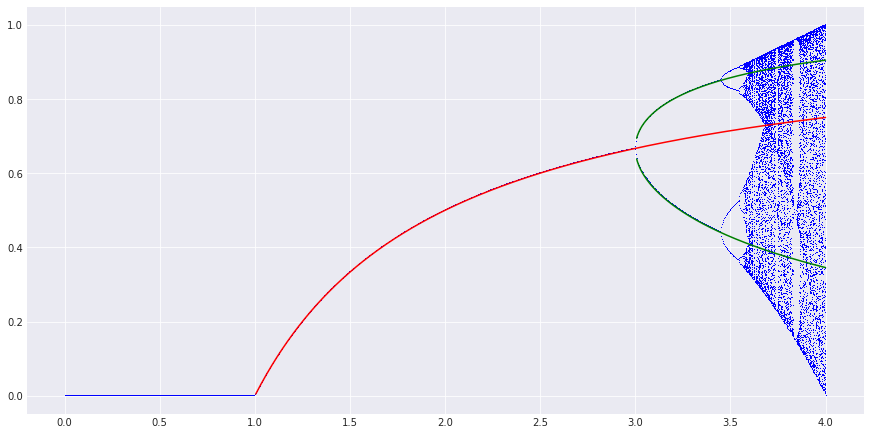

In [14]:
alphas = np.linspace(0, 4, 1000)
values = []
def fct(alpha, x):
    return alpha * x * (1 - x)

for i in range(1000):
    alpha = alphas[i]
    x = 0.5
    for j in range(1000):
        x = fct(alpha, x)
        if j >= 900:
            values.append(x)      
            
# calculate fixed points
fixed_points = 1 - (1 / (alphas[251:]))

# calculate period 2-cycles
period_cycle1 = 1/2 * ((1 + 1 / alphas[751:]) + ((1 / alphas[751:])*(np.sqrt((alphas[751:] - 3)*(alphas[751:] + 1)))))
period_cycle2 = 1/2 * ((1 + 1 / alphas[751:]) - ((1 / alphas[751:])*(np.sqrt((alphas[751:] - 3)*(alphas[751:] + 1)))))

# plot bifurcation diagram
fig = plt.figure()
fig.set_size_inches(15, 7.5)
plt.plot(np.repeat(alphas, 100), values, ',', color='blue')
plt.plot(alphas[251:], fixed_points, color='red')
plt.plot(alphas[751:], period_cycle1, color='green')
plt.plot(alphas[751:], period_cycle2, color='green')